<a target="_blank" href="https://colab.research.google.com/github/knapweedss/TextMining_HSE/blob/main/autumn_2024/sem05/Sem5_visualization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Очень рекомендуется почитать [хендбук от Яндекса](https://education.yandex.ru/handbook/data-analysis/article/ispolzovanie-vizualizacii-dannyh-v-issledovaniyah)

Для заинтересовавшихся ссылка на [Прикладной анализ данных в социальных науках](https://education.yandex.ru/handbook/data-analysis)

# Matplotlib. Простые графики



> Matplotlib — это библиотека для языка программирования Python, предназначенная для создания визуализаций. Она широко используется для построения графиков и диаграмм различных типов, таких как линейные графики, гистограммы, диаграммы рассеяния (scatter-плоты), и т.д.




In [ ]:
# pip install matplotlib - если не установлено
import matplotlib.pyplot as plt

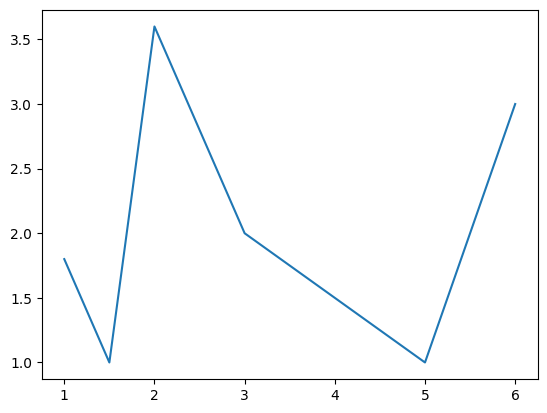

In [ ]:
# X и Y - координаты точек
X = [1, 1.5, 2, 3, 5, 6]
Y = [1.8, 1, 3.6, 2, 1, 3]

plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.show()

Можем просто нарисовать точки - scatterplot. Кроме того, мы можем добавить нашему графику загловок и подписи осей:

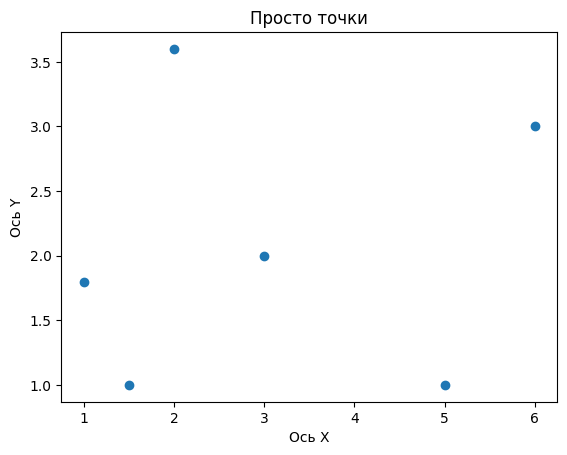

In [ ]:
plt.scatter(X,Y)  # рисуем точки
plt.title("Просто точки")
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.show()

С помощью xlim и ylim можно указать масштаб графика по оси X и Y:

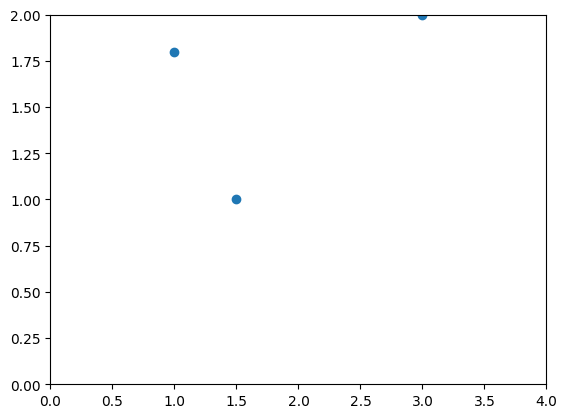

In [ ]:
plt.scatter(X, Y)
plt.xlim(0,4)
plt.ylim(0,2)
plt.show()

**Можно кастомизировать график, передав аргументы в `plt.scatter()`**

When drawing points with `plt.scatter()`, you can pass additional parameters to customize their appearance:

* `s`: размер точки, по умолчанию 20
* `c`: цвет точки, по умолчанию  `'b'` (blue)
* `marker`: символ точки, по умолчанию `'o'` (circle)

Вот некоторые наиболее популярные:


**Для точек:**

| Marker | Notation |
| --- | --- |
| Point | `.` |
| Circle | `o` |
| Triangle Down | `v` |
| Triangle Up | `^` |
| Triangle Left | `<` |
| Triangle Right | `>` |
| Octagon | `8` |
| Square | `s` |
| Pentagon | `p` |
| Plus (filled) | `P` |
| Diamond | `D` |
| Hexagon | `h` |

**Для задания цвета:**

| Color | Short Notation | Long Notation |
| --- | --- | --- |
| Blue | `b` | `blue` |
| Green | `g` | `green` |
| Red | `r` | `red` |
| Cyan | `c` | `cyan` |
| Magenta | `m` | `magenta` |
| Yellow | `y` | `yellow` |
| Black | `k` | `black` |
| White | `w` | `white` |

- Все стандартные цвета можно посмотреть[здесь](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- Есть еще более ["экзотические" цвета](https://xkcd.com/color/rgb/)
- Все маркеры можно найти [здесь](https://matplotlib.org/2.0.2/examples/lines_bars_and_markers/marker_reference.html)

В качестве размера и цвета можно задавать массивы с соответствующими значениями:

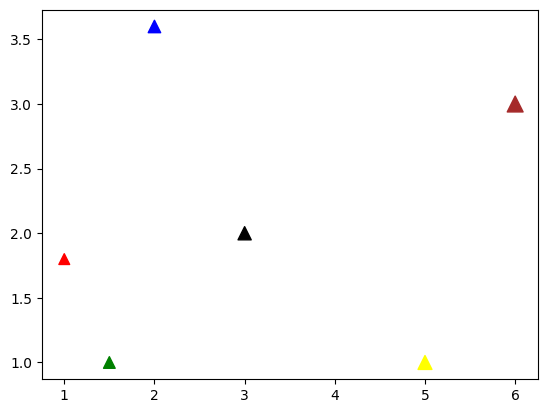

In [ ]:
size = [60, 70, 80, 90, 100, 130]
colors = ['red', 'green', 'blue', 'black', 'yellow', 'brown']
plt.scatter(X, Y, s=size, c=colors, marker='^')
plt.show()

Можно подписать не только название графика и оси, но и сами точки. Сделать это проще всего тоже в цикле:

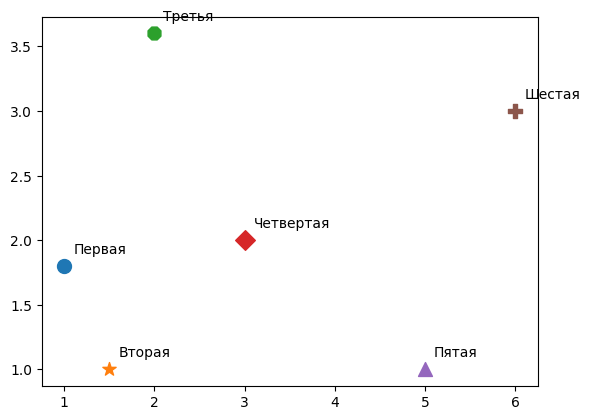

In [ ]:
markers = ['o', '*', '8', 'D', '^', 'P'] # список маркеров
dots = ['Первая', "Вторая", "Третья", "Четвертая", "Пятая", "Шестая"] # подписи

for x, y, m, d in zip(X, Y, markers, dots):
    plt.scatter(x, y, marker=m, s=100)
    # +0.1 - это чтобы текст не наползал на маркер, а отрисовывался чуть выше и правее
    plt.text(x+0.1, y+0.1, d)
plt.show()

Пока мы познакомились с визуализациями на замоканных данных, давайте загрузим какой-нибудь датасет

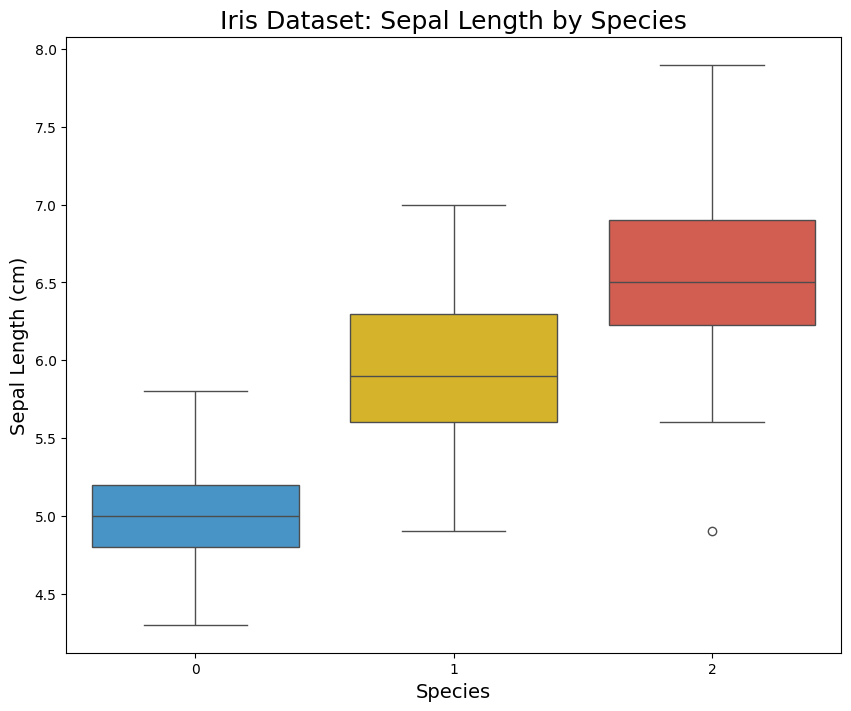

In [ ]:
import pandas as pd
import seaborn as sns # подробнее про seaborn чуть позже
from sklearn.datasets import load_iris

# скачиваем датасет iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Боксплот с распределением длины чашелистика
plt.figure(figsize=(10, 8))
sns.boxplot(x="species", y="sepal length (cm)", data=df, hue="species",
            palette=["#3498db", "#f1c40f", "#e74c3c"], legend=False)
plt.title('Iris Dataset: Sepal Length by Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal Length (cm)', fontsize=14)
plt.show()

# Seaborn. Продвинутые визуализации

> Библиотека визуализации данных на основе Matplotlib, предоставляющем высокоуровневый интерфейс для изображения интересных и информативных статистических графиков



Есть датасеты, которые доступны из библиотеки - их нужно только подгрузить

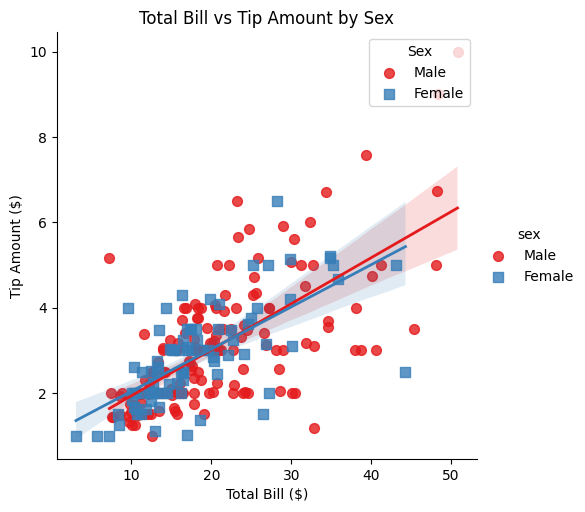

In [ ]:
# скачиваем датасет
tips = sns.load_dataset("tips")

# Диаграмма рассеяния с линией регрессии
sns.lmplot(x="total_bill", y="tip", data=tips,
           hue="sex", markers=["o", "s"], palette="Set1",
           scatter_kws={"s": 50}, line_kws={"lw": 2})
# Заголовок и лейблы
plt.title("Total Bill vs Tip Amount by Sex")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip Amount ($)")
# Делаем кастомную легенду
plt.legend(title="Sex", loc="upper right", frameon=True)
plt.show()

Поработаем с датасетом твиттера - будем использовать matplotlib и seaborn

In [ ]:
! wget -O tweets.csv https://github.com/alvarobartt/twitter-stock-recommendation/raw/master/companylist.csv

--2024-05-17 20:55:11--  https://github.com/alvarobartt/twitter-stock-recommendation/raw/master/companylist.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alvarobartt/twitter-stock-recommendation/master/companylist.csv [following]
--2024-05-17 20:55:11--  https://raw.githubusercontent.com/alvarobartt/twitter-stock-recommendation/master/companylist.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 490151 (479K) [text/plain]
Saving to: ‘twits.csv’

twits.csv           100%[===================>] 478.66K  --.-KB/s    in 0.05s   

2024-05-17 20:55:11 (9.94 MB/s) - ‘twits.csv’ saved [490151/490

In [ ]:
!ls

sample_data  twits.csv


In [ ]:
import pandas as pd
tweets = pd.read_csv('tweets.csv')

In [ ]:
tweets.head(2)

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
0,PIH,"1347 Property Insurance Holdings, Inc.",7.3962,4.426453e+07,NaN,2014.0,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pih,NaN
1,PIHPP,"1347 Property Insurance Holdings, Inc.",26.6700,0.000000e+00,NaN,NaN,Finance,Property-Casualty Insurers,https://www.nasdaq.com/symbol/pihpp,NaN


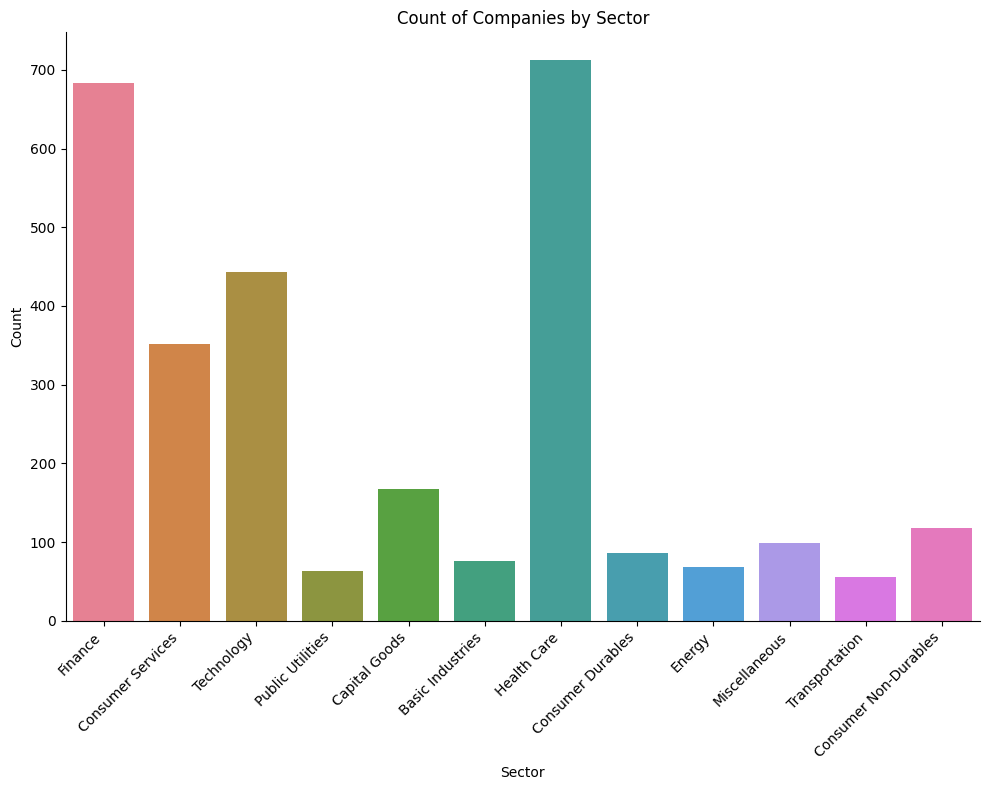

In [ ]:
plt.figure(figsize=(10, 8))
# x="Sector": Посчитать количество компаний для каждого сектора
# hue="Sector": Различные цвета для каждого сектора
# data=tweets: Используемые данные из DataFrame tweets
# legend=False: Отключаем автоматическое создание легенды
sns.countplot(x="Sector", hue="Sector", data=tweets, legend=False)  # используем seaborn
plt.title("Count of Companies by Sector")
plt.xlabel("Sector")
plt.ylabel("Count")
# Поворот меток оси X на 45 градусов для улучшения читаемости
plt.xticks(rotation=45, ha="right")
# Удаляем верхнюю и правую границы графика для улучшенного визуального вида
sns.despine()
# Автоматическое распределение компонентов графика, чтобы они не перекрывались
plt.tight_layout()
plt.show()

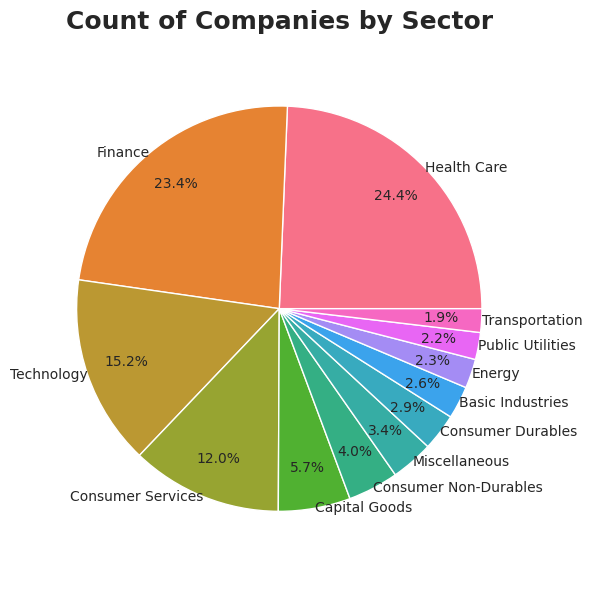

In [ ]:
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")  # добавляем стиль через seaborn

counts = tweets["Sector"].value_counts()  # количество компаний по столбцу Sector
plt.pie(
    counts,
    labels=counts.index,  # метки на диаграмме
    autopct="%1.1f%%",  # отображение процентов
    colors=sns.color_palette("husl", len(counts)),  # задаем красивые цвета
    pctdistance=0.8,  # расстояние меток-процентов от центра круга
    labeldistance=1,
)

plt.title("Count of Companies by Sector", fontsize=18, fontweight="bold")
plt.axis("equal")
plt.tight_layout()
plt.show()

# Plotly

> Библиотека Plotly - позволяет создавать интерактивные графики высокого качества




- [Статья на хабре](https://habr.com/ru/articles/502958/)
- [Документация](https://plotly.com/python/)

!!! при выгрузке .ipynb отображение графиков не сохранится - в таких случаях лучше скидывать ссылкой на колаб

Сравним наши графики, полученные выше через seaborn и matplotlib, с plotly

In [ ]:
import plotly.express as px
# пока выведем без отдельного цвета для каждого столбца, но это тоже возможно
# но в plotly реализуется сложнее
fig = px.histogram(tweets, x="Sector", title="Count of Companies by Sector")
fig.update_layout(xaxis_title="Sector",  # подпись по Х
                  yaxis_title="Count",  # подпись по Y
                  bargap=0.1,  # отступ между столбцами
                  bargroupgap=0.1,  # отступ между группами столбцов
                  font=dict(size=12, family="Arial")) # шрифт
# Настраиваем ось x так, чтобы метки были под углом 45 градусов
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
# круговая диаграмма с данными о секторах компаний
fig = px.pie(
    values=counts,  # Значения для круговой диаграммы (количество компаний в каждом секторе)
    names=counts.index,  # Метки для круговой диаграммы (названия секторов)
    title="Count of Companies by Sector",
)
fig.update_traces(
    textposition="inside",  # расположение текста (внутри секций)
    textinfo="percent+label",  # отображение процентов и меток
)

fig.update_layout(
    font=dict(size=18, family="Arial"),  # Настройка шрифта для всей диаграммы
    title=dict(font=dict(size=24, family="Arial")),  # Настройка шрифта для заголовка
)
fig.show()

Посмотрим на некоторые примеры из документации

уже знакомый нам датасет iris

In [ ]:
import plotly.graph_objects as go
df = px.data.iris()

# Создаем диаграмму разброса с данными "iris"
# Координаты по оси x - sepal_width, по оси y - sepal_length
# Цвет точек зависит от вида цветка (species)
# Данные распределены по столбцам в зависимости от вида цветка (facet_col)
fig = px.scatter(
    df,
    x="sepal_width",
    y="sepal_length",
    color="species",
    facet_col="species",
    title="Adding Traces To Subplots Within A Plotly Express Figure"
)

reference_line = go.Scatter(x=[2, 4],
                            y=[4, 8],
                            mode="lines", # режим отображения - линии
                            line=go.scatter.Line(color="gray"), # задаем цвет линии
                            showlegend=False) # не отображаем легенду для линии

# Добавляем линию на первый подграфик
fig.add_trace(reference_line, row=1, col=1)
# Добавляем линию на второй подграфик
fig.add_trace(reference_line, row=1, col=2)
# Добавляем линию на третий подграфик
fig.add_trace(reference_line, row=1, col=3)

fig.show()

уже знакомый нам датасет tips

In [ ]:
df = px.data.tips()

# Создаем коробчатую диаграмму (box plot) с данными "tips"
# По оси x отображаем дни недели (day)
# По оси y отображаем общую сумму счета (total_bill)
# Цвет ящиков зависит от параметра "smoker" (курящий/некурящий)
fig = px.box(df, x="day", y="total_bill", color="smoker")
# Обновляем метод вычисления квартилей для ящиков
# Используем метод "exclusive",
# можно также использовать "inclusive" или "linear" по умолчанию
fig.update_traces(quartilemethod="exclusive")
fig.show()

*Для справки*
1. exclusive:
   - Этот метод исключает сам медианный элемент при вычислении квартилей.
   - Использование этого метода обычно приводит к тому, что первое и третье квартильные значения менее подвержены влиянию распределения данных по сравнению с другими методами.

2. inclusive:
   - Включает медианный элемент в расчет квартилей.
   - Этот метод менее устойчив к отклонениям, так как медианный элемент оказывает влияние на значения квартилей.

3. linear:
   - Линейная интерполяция квартилей - это метод вычисления, при котором квартильные значения находятся путем линейной интерполяции первого и третьего квартилей.
   - Часто используется как метод по умолчанию, обеспечивает плавное распределение значений.

Можно строить воронки!

In [ ]:
fig = go.Figure(go.Funnel(
    y = ["Website visit", "Downloads", "Potential customers", "Requested price", "Finalized"],
    x = [39, 27.4, 20.6, 11, 2],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

# Wordcloud



> Облако слов - визуализация, содержащая слова из некоторого набора данных, при этом размер шрифта прямо пропорционален частотности слова в наборе

Можем построить с использованием библиотеки wordcloud в питоне



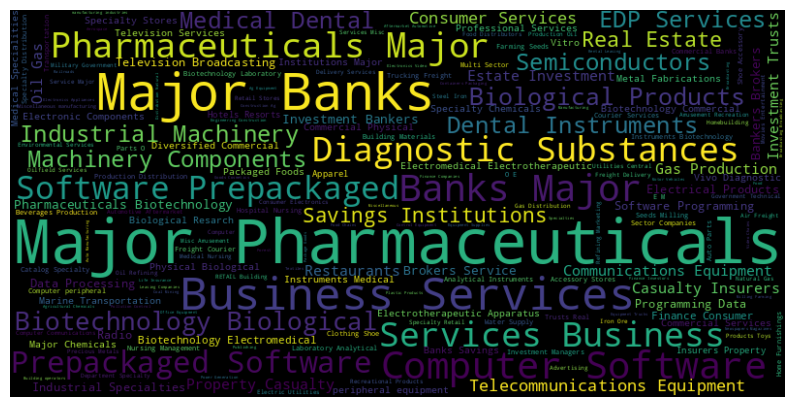

In [ ]:
from wordcloud import WordCloud


text_data = ' '.join(tweets['Industry'].dropna().tolist()) # не забываем удалить NaN
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()